# **Tidy Tuesday: Roundabouts**
**December 16, 2025**


* How has roundabout construction evolved over time? Are certain regions adopting them faster than others?
* What types of intersections are most commonly converted to roundabouts?
* Where are the roundabouts with the most unusual configurations (highest number of approaches/driveways)?


In [17]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Data Preview

In [18]:
roundabouts_clean = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-12-16/roundabouts_clean.csv')

In [19]:
roundabouts_clean.head()

,name,address,town_city,county_area,state_region,country,lat,long,type,status,year_completed,approaches,driveways,lane_type,functional_class,control_type,other_control_type,previous_control_type
0,Arapahoe Ave. / 4th St.,"Boulder, Boulder Co., CO (United States)",Boulder,Boulder Co.,CO,United States,-105.29160,40.01294,Traffic Calming Circle,Existing,0,3,0,Single-Lane,Other (At-Grade),One-Way/Two-Way Stop,NaN,Unknown
1,Arapahoe Ave. / 5th St.,"Boulder, Boulder Co., CO (United States)",Boulder,Boulder Co.,CO,United States,-105.28920,40.01295,Traffic Calming Circle,Existing,0,3,0,Single-Lane,Other (At-Grade),One-Way/Two-Way Stop,NaN,Unknown
2,10th Ave. / B St.,"Belmar, Monmouth Co., NJ (United States)",Belmar,Monmouth Co.,NJ,United States,-74.01782,40.17772,Traffic Calming Circle,Existing,0,4,0,Single-Lane,Other (At-Grade),Unknown,Unknown,Unknown
3,10th Ave. / D St.,"Belmar, Monmouth Co., NJ (United States)",Belmar,Monmouth Co.,NJ,United States,-74.02169,40.17855,Traffic Calming Circle,Existing,0,4,0,Single-Lane,Other (At-Grade),Unknown,Unknown,Unknown
4,Bagley Ave. N / N 42nd St.,"Seattle, King Co., WA (United States)",Seattle,King Co.,WA,United States,-122.33260,47.65796,Traffic Calming Circle,Existing,0,0,0,Unknown,Other (At-Grade),Unknown,Unknown,Unknown


In [20]:
roundabouts_clean.shape

(27887, 18)

## **Roundabout construction over time**
How has roundabout construction evolved over time? Are certain regions adopting them faster than others?

In [21]:
# Check value counts real quick
roundabouts_clean.year_completed.value_counts()

year_completed
0       16367
2018      669
2017      656
2016      637
2019      608
        ...  
1910        1
1917        1
1920        1
1930        1
1815        1
Name: count, Length: 77, dtype: int64

That is a lot of 0 values, which means that a lot of the roundabouts recorded were constructed at an unknown date. I will remove such data for this analysis.

In [22]:
# Filter/mask out the roundabouts with unknown years
rounds = roundabouts_clean[roundabouts_clean['year_completed'] != 0]

print(rounds.shape)
rounds.head()

(11520, 18)


,name,address,town_city,county_area,state_region,country,lat,long,type,status,year_completed,approaches,driveways,lane_type,functional_class,control_type,other_control_type,previous_control_type
8,Kendall Ave. / Grand Ave.,"Madison, Dane Co., WI (United States)",Madison,Dane Co.,WI,United States,-89.43156,43.07145,Traffic Calming Circle,Existing,1997,4,0,Single-Lane,Other (At-Grade),Unknown,Unknown,Unknown
13,Capitol Ave. / 12th St.,"Springfield, Sangamon Co., IL (United States)",Springfield,Sangamon Co.,IL,United States,-89.63947,39.79816,Roundabout,Existing,2012,4,0,Single-Lane,Other (At-Grade),All-Way Yield,NaN,All-Way Stop
16,Ridgewood St. / Casler Ave.,"Clearwater, Pinellas Co., FL (United States)",Clearwater,Pinellas Co.,FL,United States,-82.76752,27.97013,Traffic Calming Circle,Existing,2002,0,0,Single-Lane,Other (At-Grade),All-Way Yield,NaN,Unknown
17,Darien Ln. / (unknown),"Twinsburg, Summit Co., OH (United States)",Twinsburg,Summit Co.,OH,United States,-81.42608,41.32028,Traffic Calming Circle,Existing,2007,4,0,Single-Lane,Other (At-Grade),All-Way Yield,NaN,Unknown
20,Old Mill Pointe / (unknown),"Wattsville, Accomack Co., VA (United States)",Wattsville,Accomack Co.,VA,United States,-75.48857,37.95075,Traffic Calming Circle,Existing,2008,3,0,Single-Lane,Other (At-Grade),All-Way Yield,NaN,None (new)


A plot on how many roundabouts were completed per year.

In [69]:
# Prepare the data
round_years = pd.DataFrame(rounds.year_completed.value_counts()).sort_values(['year_completed']) # Create a dataframe from the value counts, sorted
round_years.reset_index(level=0, inplace=True) # Reset the index so year isn't the index
#round_years

In [72]:
round_years

,year_completed,count
0,1791,1
1,1807,1
2,1815,1
3,1820,1
4,1876,1
...,...,...
71,2019,608
72,2020,589
73,2021,502
74,2022,388


In [73]:
round_years['count']

0       1
1       1
2       1
3       1
4       1
     ... 
71    608
72    589
73    502
74    388
75     57
Name: count, Length: 76, dtype: int64

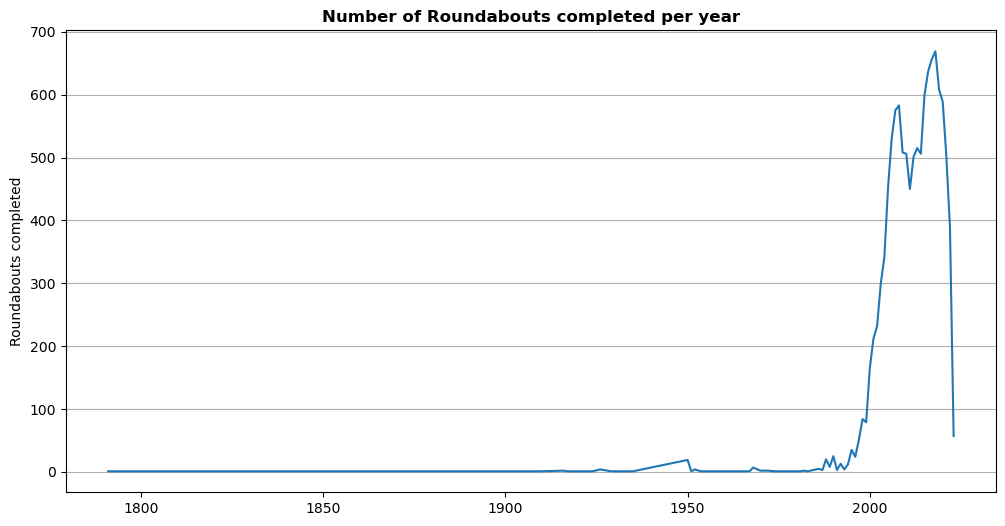

In [77]:
plt.figure(figsize=(12,6))
plt.plot(round_years.year_completed, round_years['count'])
plt.grid(axis='y')
plt.title('Number of Roundabouts completed per year', fontweight='bold')
plt.ylabel('Roundabouts completed')
plt.show()

Around what appears to be the 1990s is when a lot of roundabouts were constructed. To focus in on the years 1980 onwards:

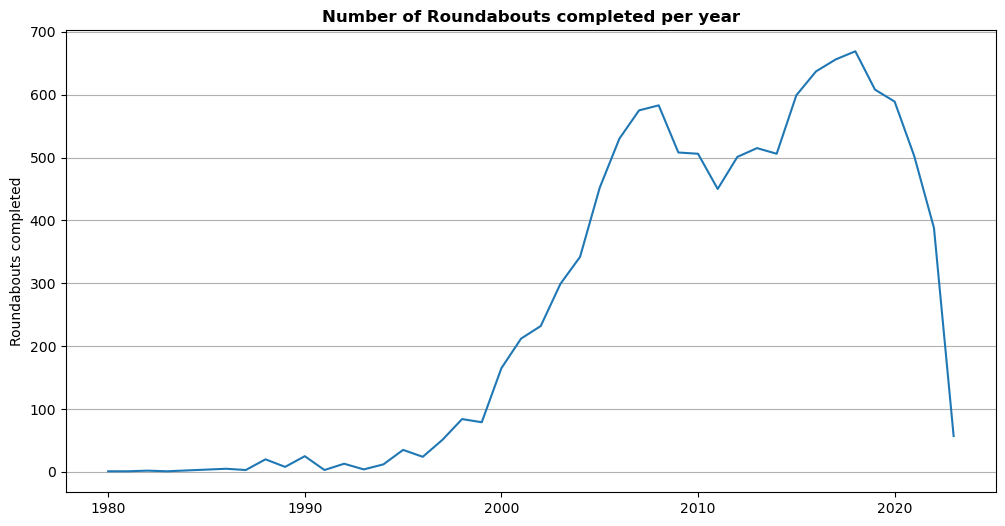

In [82]:
plt.figure(figsize=(12,6))
plt.plot(round_years.year_completed[34:], round_years['count'][34:])
plt.grid(axis='y')
plt.title('Number of Roundabouts completed per year', fontweight='bold')
plt.ylabel('Roundabouts completed')
plt.show()

Note that I did remove the roundabout data for the ones without a completion date, so the observation may not be the most accurate.

Now, does region have an effect on roundabout construction?

In [86]:
# First, look at what countries are represented
rounds['country'].value_counts()

country
United States         10283
Canada                 1173
Sweden                   42
Japan                     4
United Kingdom            4
Australia                 2
Croatia                   2
Poland                    2
Netherlands               1
Luxembourg                1
Portugal                  1
Turkey                    1
Faroe Islands             1
Uzbekistan                1
Dominican Republic        1
Slovenia                  1
Name: count, dtype: int64

Clearly, this dataset focuses on the United States and Canada the most. For familiarity purposes, I will focus on these two countries.

In [106]:
usa = rounds[rounds['country'] == 'United States']
can = rounds[rounds['country'] == 'Canada']
usacan = pd.concat([usa, can])
#usacan

In [110]:
usacan.address.value_counts().head(10)

address
Carmel, Hamilton Co., IN (United States)             139
Lincoln, Lancaster Co., NE (United States)            82
Portland, Multnomah Co., OR (United States)           76
Colorado Springs, El Paso Co., CO (United States)     75
Miami, Miami-Dade Co., FL (United States)             72
Loveland, Larimer Co., CO (United States)             59
El Paso, El Paso Co., TX (United States)              57
Calgary, Alberta, AB (Canada)                         54
Fort Worth, Tarrant Co., TX (United States)           52
Bend, Deschutes Co., OR (United States)               51
Name: count, dtype: int64